# The Global Ocean Observing System

Here we use the [OceanOPS](https://juliaocean.github.io/OceanRobots.jl/dev/examples/OceanOPS.html) module from the `OceanRobots.jl` package that is helfpul to monitor current and planned deployments of observing networks.

See the `OceanRobots.jl` package [docs here](https://juliaocean.github.io/OceanRobots.jl/dev/) for a deeper look at data collections for which additional support is provided.

Source : <https://www.ocean-ops.org/board>, <https://www.ocean-ops.org/share/>

In [10]:
#Let's start a temporary environment for this notebook, and add julia packages that we will 
if !isdefined(Main,:Shapefile)
    using Pkg; Pkg.activate(temp=true)
    Pkg.add.(["OceanRobots", "CairoMakie", "MeshArrays","Shapefile",
        "Shapefile", "GeoJSON", "DataDeps", "PrettyTables", "Proj"])
end

using OceanRobots, CairoMakie, MeshArrays
using Shapefile, GeoJSON, DataDeps, PrettyTables, Proj

OceanRobotsMakieExt=Base.get_extension(OceanRobots, :OceanRobotsMakieExt)

OceanRobotsMakieExt

## Datasets

In [2]:
nam=:Drifter
list_data=OceanOPS.get_list(nam);

In [3]:
id=list_data[1000]
meta=OceanOPS.get_platform(id)

(id = "4602742", country = "United States", status = "OPERATIONAL", deployed = "2021-11-02T09:28:00", ship = "SALLY RIDE")

In [4]:
fil=demo.download_polygons("ne_110m_admin_0_countries.shp")
#fil=demo.download_polygons("countries.geojson")
pol=MeshArrays.read_polygons(fil);

In [5]:
list_platform_types=OceanOPS.list_platform_types();

nam_platform_types="TROPICAL_MB"
more_platform_ii=findall(list_platform_types.nameShort.==nam_platform_types)[1]
more_platform_name=list_platform_types[more_platform_ii,:name]

more_operational=OceanOPS.get_list_pos(Symbol(nam_platform_types));

In [6]:
argo_operational=OceanOPS.get_list_pos(:Argo)

a0=OceanOPS.get_list_pos(:Argo,status=:PROBABLE)
a1=OceanOPS.get_list_pos(:Argo,status=:CONFIRMED)
a2=OceanOPS.get_list_pos(:Argo,status=:REGISTERED)

argo_planned=( lon=vcat(a0.lon,a1.lon,a2.lon),
            lat=vcat(a0.lat,a1.lat,a2.lat),
            flag=vcat(a0.flag,a1.flag,a2.flag))

drifter_operational=OceanOPS.get_list_pos(:Drifter);

## Visualisation

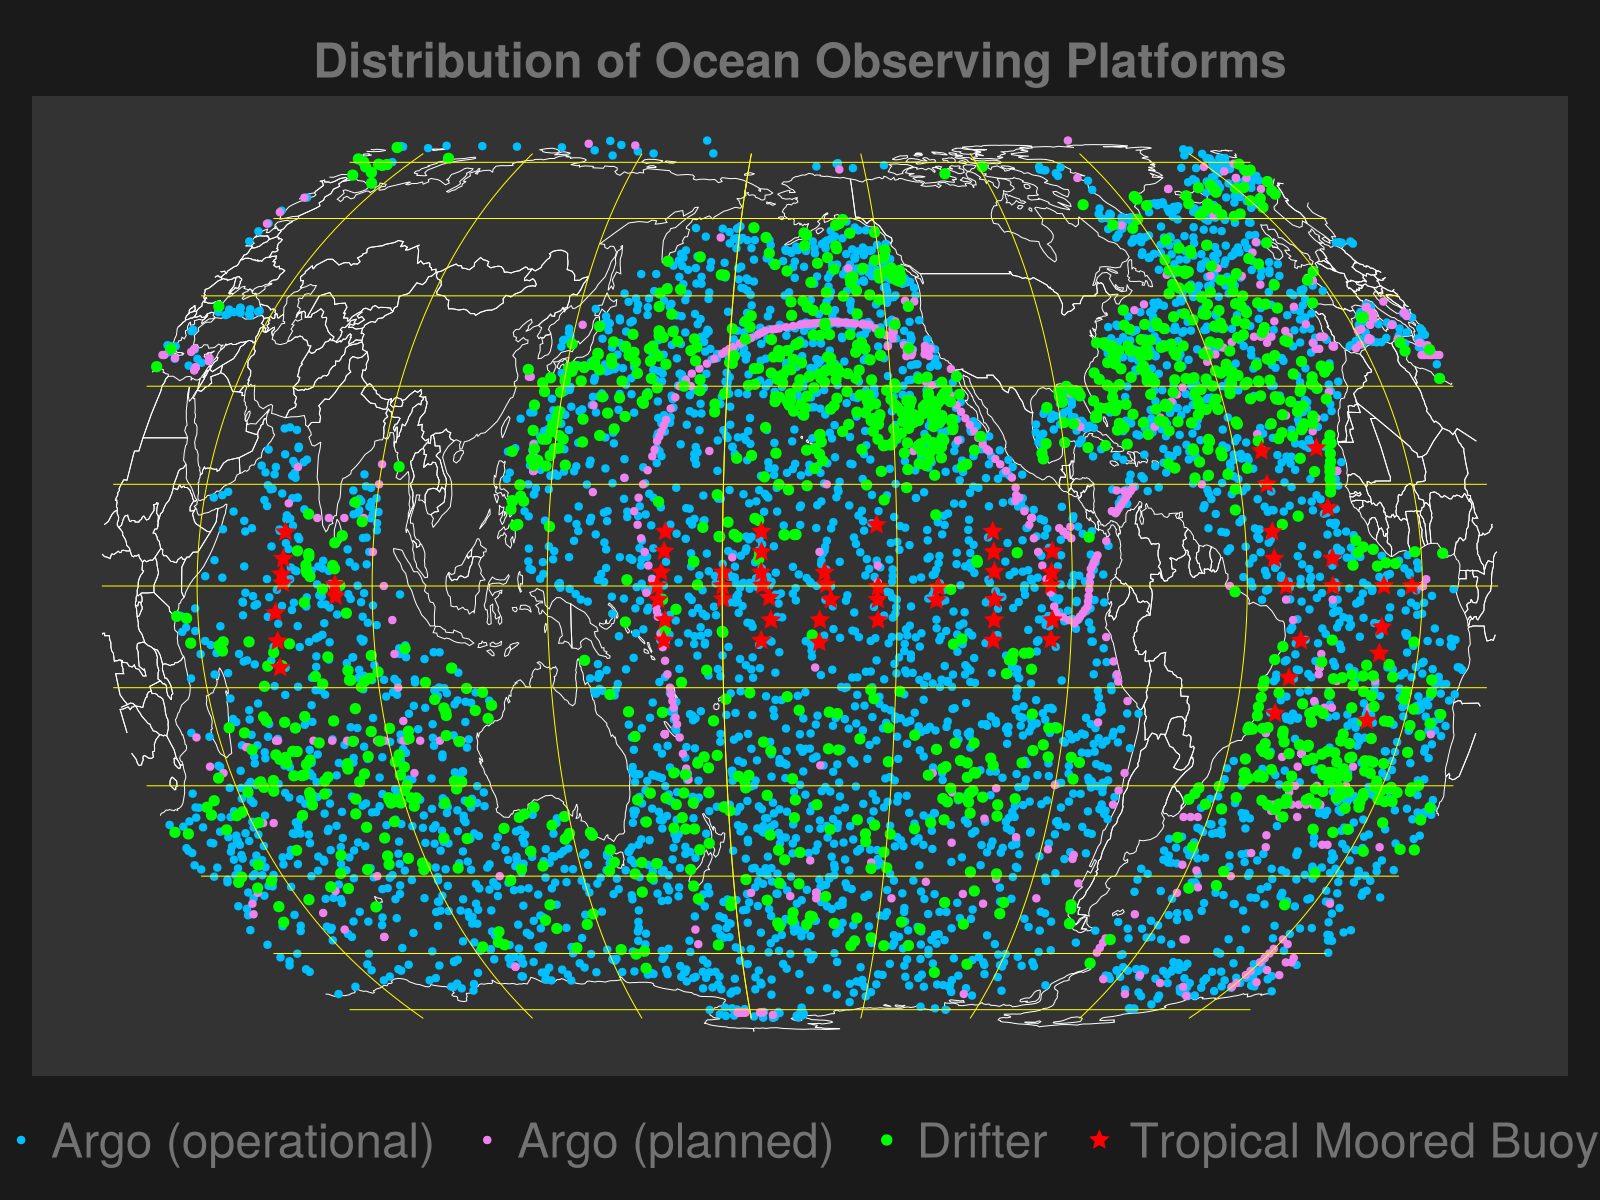

In [7]:
function demofigure()
	lon0=-160
	proj=Proj.Transformation(MA_preset=2,lon0=lon0)

	fi0=Figure(size=(800,600),fontsize=24)
	ax0=Axis(fi0[1,1],backgroundcolor = :gray20,
		title="Distribution of Ocean Observing Platforms")
	pr_ax=MeshArrays.ProjAxis(ax0; proj=proj,lon0=lon0)
	lines!(pr_ax,polygons=pol;color=:white, linewidth = 0.5)

	sc1=scatter!(pr_ax,argo_operational.lon,argo_operational.lat,
		markersize=6.0,label="Argo (operational)",color=:deepskyblue)
	sc2=scatter!(pr_ax,argo_planned.lon,argo_planned.lat,
		markersize=6.0,label="Argo (planned)",color=:violet)
	sc3=scatter!(pr_ax,drifter_operational.lon,drifter_operational.lat,
		markersize=8.0,label="Drifter",color=:green1)
	sc4=scatter!(pr_ax,more_operational.lon,more_operational.lat,
		markersize=12.0,label=more_platform_name,color=:red,marker=:star5)
	
	MeshArrays.grid_lines!(pr_ax;color=:yellow,linewidth=0.5)

	Legend(fi0[2, 1],[sc1,sc2,sc3,sc4],[sc1.label,sc2.label,sc3.label,sc4.label],
		orientation = :horizontal, fontsize=16)
	
	fi0
end

with_theme(demofigure, theme_dark())

## Observing Platforms List

In [8]:
tb=pretty_table(
    [list_platform_types[:,:name] list_platform_types[:,:wigosCode] list_platform_types[:,:id]],
    header = ["name","wigosCode","ID"],
    header_crayon = crayon"yellow bold",
    highlighters  = ( hl_col(1, crayon"yellow"),hl_col(2, crayon"white"),hl_col(3, crayon"white") ),
)
display(tb)

nothing

┌───────────────────────────────┬──────────────────┬─────────┐
│                          name │        wigosCode │      ID │
├───────────────────────────────┼──────────────────┼─────────┤
│                    Float Deep │ underwaterMobile │    1000 │
│                         Float │ underwaterMobile │      26 │
│         Ice Tethered Profiler │         seaOnIce │    1001 │
│                 Float Coastal │ underwaterMobile │    1002 │
│  Polar Ocean Profiling System │         seaOnIce │    1003 │
│                      ASAP INT │          unknown │ 1000154 │
│                      ASAP DIS │          unknown │ 1000155 │
│               Tsunameter Buoy │         seaFixed │    2000 │
│          Tropical Moored Buoy │         seaFixed │    2001 │
│             Underwater Glider │ underwaterMobile │    2003 │
│ VOS Automatic Weather Station │        seaMobile │    2009 │
│    VOS Manual Weather Station │        seaMobile │    2010 │
│                  DB POLLUTION │        seaMobile │ 10